# Diffusion Models

![](figures/ho_2020_fig_02.png)

## 1D Diffusion

Let's start simple, just doing 1D diffusion.
For 1D, it works like this:

- we start with a single scalar value $x_0$
- the *forward process* gradually adds noise to $x_0$ over the course of $T$ steps
- finally, we end up with $x_T$, which is just randomly distributed
- now, in the *backward process*, our model predicts how much noise was added in each step
- by continuously subtracting the predicted noise, we can denoise our initial data point

In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# generate our input data
# x = torch.randn(100)
x = torch.rand(100) * 10

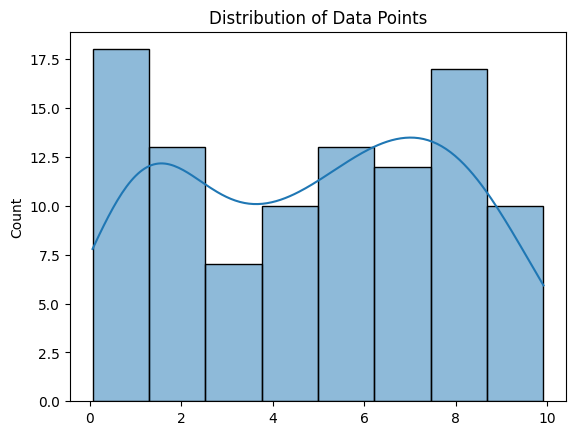

In [3]:
sns.histplot(x, kde=True)
plt.title("Distribution of Data Points");

Let's start with the forward process, where we sequentially add noise

![parameters in Ho2020](figures/ho_2020_params.png)

In [6]:
# total number of time steps - this is kind of arbitrary, not gonna lie
# you just want a number that's big enough, so that noise is added gradually
T = 100

def beta_schedule(t, beta_0=1e-4, beta_t=0.02):
    return torch.linspace(beta_0, beta_t, t)

betas = beta_schedule(T)

The paper points out, that you can sample $x_t$ at an arbitrary time point $t$ in ~~closed form~~ a single step:

$$
    q(x_t|x_0) = \mathcal{N}(x_t; \sqrt{\bar{\alpha_t}}x_0, (1-\bar{\alpha}_t) I)
$$

In [7]:
def forward_process(x, t, beta):
    alpha_t = 1 - beta
    alpha = torch.prod(alpha_t[:t])


    return torch.normal(torch.sqrt(alpha) * x, (1 - alpha))

In [5]:
class BadTrip1D(nn.Module):
    """Definitely not MidJourney"""

    def __init__(self, T):
        super().__init__()
        # total number of time steps
        self.T = T

        # two inputs, since we process x and the current time step t
        self.model = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x, t):
        """Implements Reverse Process (despite the name)"""
        # expects x and t to be [N, 1] shaped tensors (N being Batch)
        if t.ndim == 1:
            t = t.unsqueeze(1)
        
        # normalize time steps
        t = t.float() / self.T
        y = self.model(torch.cat([x, t], dim=1))
        return y

In [22]:
torch.prod(torch.tensor([1,2,3]))

tensor(6)

## Literature

Denoising Diffusion Probabilistic Models
- https://arxiv.org/abs/2006.11239
- https://proceedings.neurips.cc/paper/2020/file/4c5bcfec8584af0d967f1ab10179ca4b-Paper.pdf


An Overview of Diffusion Models
- https://arxiv.org/abs/2404.07771

Tutorials
- https://deeplearning.neuromatch.io/tutorials/W2D4_GenerativeModels/student/W2D4_Tutorial2.html